# The following code fetches MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Exploring The Dataset


In [3]:
pip install numpy


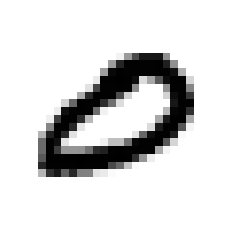

'0'

In [4]:
# import matplotlib as mlb
# import matplotlib.pyplot as plt

# X, y =  mnist["data"], mnist["target"]
# some_digit = X[4800]
# some_digit_image = some_digit.reshape(28,28)
# plt.imshow(some_digit_image, cmap=mlb.cm.binary, interpolation="nearest")
# plt.axis("off")
# plt.show()
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
i = random.randint(0,70000)
X, y = mnist['data'], mnist['target']
random_digit = X.to_numpy()[i]
random_digit_image = random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[i]

In [5]:
X_train,X_test,y_train,y_test = X[:6000],X[6000:7000],y[:6000],y[6000:7000]


# Shuffling the data

In [6]:
# import numpy as np
# shuffle_index = np.random.permutation(6000)
# X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

# Creating a predictor using Binary Classifier

In [7]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==6)
y_test_2 = (y_test==6)
print(y_test_2)

6000     True
6001    False
6002    False
6003    False
6004    False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: class, Length: 1000, dtype: bool


# Training a Binary Classifier

# Creating A Predictor Using  Stochastic Gradient Decent Classifier

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_2)
sgd_clf.predict([random_digit])

array([False])

# Measuring accuracy using cross validation

In [9]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")
a.mean()

0.9813333333333333

# Creating A Predictor Using Support Vector Machine

In [10]:
from sklearn import svm
cls = svm.SVC()
cls.fit(X_train, y_train_2)
cls.predict([random_digit])

array([False])

# Measuring accuracy using cross validation

In [11]:
b= cross_val_score(cls, X_train , y_train_2, cv=3, scoring="accuracy")
b.mean()

0.9910000000000001

# To evaluate the performance of a classifier is to look at the confusion matrix
# To compute confusion matrix first you need to have a set of predictions so they can be compared to the actual targets.

# for making prediction we can use cross_val_predict()

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_2, cv=3)

# Now get the confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[5336,   56],
       [  56,  552]], dtype=int64)

In [14]:
y_train_perfect_predictions = y_train_2
confusion_matrix(y_train_2, y_train_perfect_predictions)

array([[5392,    0],
       [   0,  608]], dtype=int64)

# Computing Precision and Recall

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_2, y_train_pred)


0.9078947368421053

In [16]:
recall_score(y_train_2, y_train_pred)

0.9078947368421053

In [17]:
f1_score(y_train_2, y_train_pred)

0.9078947368421053

In [18]:
y_scores = sgd_clf.decision_function([random_digit])
y_scores

array([-415199.53544803])

# use of threshold (Precision/Recall Tradeoff)

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train_2, cv=3, method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

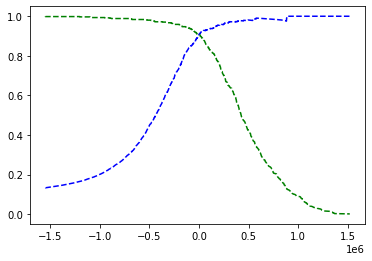

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

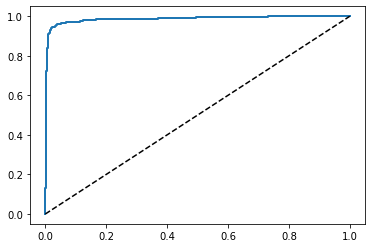

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2 , label=label)
    plt.plot([0,1],[0,1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_2, y_scores)

0.9879420535295954